<a href="https://colab.research.google.com/github/tmalveirac/fcpc/blob/master/fcpc_analise_pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Pagamentos para Pessoa Física FCPC - Fundação Cearense de Pesquisa e Cultura - CNPJ 05.330.436/0001-62


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  
plt.rcParams['figure.figsize'] = (20,7)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.float_format = '${:,.2f}'.format

In [2]:
#Pagamentos pessoa física 2020
df_2020 = pd.read_csv('/content/2020.csv')
df_2020['ano'] = 2020
#Append com os dados histórios de 2002-2019
df_2002_2019 = pd.read_csv('/content/fcpc_despesas_pf_2002_2019.csv')
df = df_2020.append(df_2002_2019)
df

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO,DATA,VALOR (R$),ano
0,***.000.443-**,VIRGINIA XAVIER NUNES,BOLSA DE ESTUDO E PESQUISA,3510 - ACORDO DE PARCERIA LOCKTEC/FCPC/IFCE - ...,06/04/2020,"1.100,00",2020
1,***.000.443-**,VIRGINIA XAVIER NUNES,BOLSA DE ESTUDO E PESQUISA,3510 - ACORDO DE PARCERIA LOCKTEC/FCPC/IFCE - ...,03/03/2020,"1.100,00",2020
2,***.000.443-**,VIRGINIA XAVIER NUNES,BOLSA DE ESTUDO E PESQUISA,3510 - ACORDO DE PARCERIA LOCKTEC/FCPC/IFCE - ...,10/02/2020,"1.100,00",2020
3,***.001.953-**,BIANCA MARIA DE MELO ALVES COELHO,RPA [P.FÍSICA],3464 - TC. LG/UFC/FCPC - AVANTTE,06/03/2020,"4.950,00",2020
4,***.002.393-**,GEISIANE FRANCA ALMEIDA,LIQUIDO DA FOLHA,3548 - TC. LENOVO/UFC/FCPC - LDE: LENOVO DIAGN...,22/04/2020,"3.031,21",2020
...,...,...,...,...,...,...,...
239604,NÃO SE APLICA,JANAINA BACELO DE FIGUEIREDO,DIÁRIAS [PAGTO],3460 - CT. UFC/FCPC - PARFOR 75/2018,28/08/2019,"177,00",2019
239605,NÃO SE APLICA,JANAINA BACELO DE FIGUEIREDO,DIÁRIAS [PAGTO],3460 - CT. UFC/FCPC - PARFOR 75/2018,21/08/2019,"177,00",2019
239606,NÃO SE APLICA,JANAINA BACELO DE FIGUEIREDO,DIÁRIAS [PAGTO],3460 - CT. UFC/FCPC - PARFOR 75/2018,14/08/2019,"177,00",2019
239607,NÃO SE APLICA,JANAINA BACELO DE FIGUEIREDO,DIÁRIAS [PAGTO],3460 - CT. UFC/FCPC - PARFOR 75/2018,01/08/2019,"177,00",2019


In [3]:
#Tratando o valor
df['valor_limpo'] = df['VALOR (R$)'].str.replace('.', '').str.replace(',', '.')
#Convertendo para Numerico
df['valor_numerico'] = pd.to_numeric(df['valor_limpo'])
df.describe()

,ano,valor_numerico
count,"$242,299.00","$242,299.00"
mean,"$2,011.44","$1,603.80"
std,$4.92,"$3,088.20"
min,"$2,002.00",$0.00
25%,"$2,007.00",$180.00
50%,"$2,012.00",$622.00
75%,"$2,015.00","$2,000.00"
max,"$2,020.00","$328,428.65"


In [4]:
#Tratando a data
#dmy_dt2 = datetime.strptime(date_str2, '%m/%d/%y') 
df['data_limpa'] = pd.to_datetime(df['DATA']) 
df['data_limpa'].describe()

count                  242299
unique                   4441
top       2002-12-20 00:00:00
freq                     2382
first     2002-01-02 00:00:00
last      2020-12-03 00:00:00
Name: data_limpa, dtype: object

# Análise Total por Ano


In [5]:
total_ano_df =  df.groupby('ano')['valor_numerico'].sum()
total_ano_df

ano
2002   $17,675,191.56
2003    $9,408,110.81
2004   $10,082,756.28
2005   $11,926,991.68
2006   $16,814,320.76
2007   $13,491,904.83
2008    $9,027,475.89
2009   $13,029,335.26
2010   $28,027,584.68
2011   $24,811,577.93
2012   $23,927,559.13
2013   $27,713,212.87
2014   $35,337,048.72
2015   $38,892,222.45
2016   $30,550,019.40
2017   $21,727,345.20
2018   $26,781,705.72
2019   $23,556,127.87
2020    $5,817,808.41
Name: valor_numerico, dtype: float64

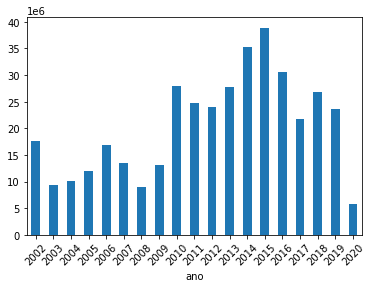

In [6]:
total_ano_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.ticklabel_format(axis="y", style="sci", scilimits=(6,6)) #Em milhões
plt.show()

## Análise Total por CPF

In [7]:
total_cpf_df =  df.groupby(['CPF', 'NOME'])['valor_numerico'].sum()
total_cpf_df.describe()

count      $28,339.00
mean       $13,712.49
std        $57,932.14
min             $0.00
25%           $285.72
50%         $1,320.00
75%         $6,000.00
max     $1,624,238.71
Name: valor_numerico, dtype: float64

In [8]:
total_cpf_top_20 = total_cpf_df.sort_values(ascending=False).head(20)
total_cpf_top_20

CPF             NOME                               
***.488.873-**  ADRIANO CESAR PRADO CYSNE             $1,624,238.71
***.966.093-**  FAUSTO NILO COSTA JUNIOR              $1,475,056.29
***.374.043-**  DAMIAO CARNEIRO DE ALMEIDA            $1,401,243.11
***.162.073-**  ANTONIO DE BARROS SERRA               $1,366,082.34
***.775.263-**  JAVAM DE CASTRO MACHADO               $1,264,069.05
***.774.083-**  RAQUEL DE MELO ROLIM                  $1,263,226.04
***.096.683-**  MARCELO ARAUJO LIMA                   $1,212,615.61
***.501.533-**  FRANCISCO RODRIGO PORTO CAVALCANTI    $1,190,588.69
***.839.713-**  FRANCISCO EDUARDO ARAUJO SOARES       $1,175,651.56
***.725.698-**  LEONILDO ADAO CHRISTOFOLETTI          $1,151,452.15
***.311.163-**  LUIZ ROBERTO DE OLIVEIRA              $1,075,104.26
***.541.043-**  MARCOS AURELIO FROTA VASCONCELOS      $1,056,103.62
***.174.183-**  FRANCISCO VANILSON PINHEIRO LEITE     $1,050,733.77
***.830.183-**  ROSSANA MARIA DE CASTRO ANDRADE       $1,040,057

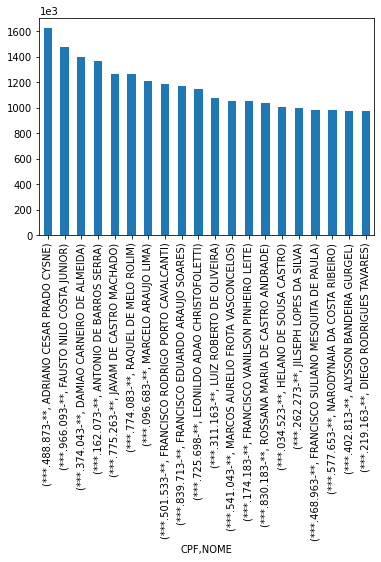

In [9]:
total_cpf_top_20.plot(kind='bar')
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3)) #Em milhares
plt.show()

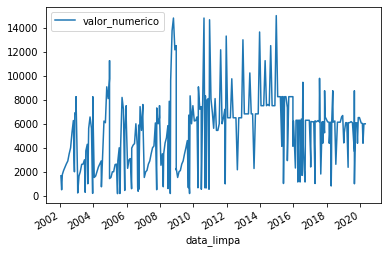

In [10]:
adriano_df = df[df['NOME'] == 'ADRIANO CESAR PRADO CYSNE'].sort_values('valor_numerico', ascending=False)
adriano_df[['data_limpa', 'valor_numerico']].sort_values('data_limpa').plot(x='data_limpa', y='valor_numerico')
plt.show()

## Análise Total de CPF por ano

In [11]:
total_cpf_ano_df =  df.groupby(['ano','CPF', 'NOME'])['valor_numerico'].sum()
total_cpf_ano_df.describe()

count    $63,551.00
mean      $6,114.75
std      $14,636.08
min           $0.00
25%         $360.00
50%       $1,400.00
75%       $5,027.52
max     $733,043.14
Name: valor_numerico, dtype: float64

In [12]:
#total_cpf_ano_top_df = pd.Series(dtype='float64', name='valor_numerico')

#Inicializar um Series com o mesmo template
total_cpf_ano_top_df = total_cpf_ano_df.head(0)

for ano in total_cpf_ano_df.index.levels[0]:
  total_cpf_ano_top_df = total_cpf_ano_top_df.append(total_cpf_ano_df[total_cpf_ano_df.index.isin([f'{ano}'], level=0)].sort_values(ascending=False).head(5))

lista_anos = [2016,2017,2018,2019,2020]
total_cpf_ano_top_df[total_cpf_ano_top_df.index.isin(lista_anos, level=0)]

ano   CPF             NOME                                  
2016  ***.839.713-**  FRANCISCO EDUARDO ARAUJO SOARES          $442,608.42
      ***.966.093-**  FAUSTO NILO COSTA JUNIOR                 $318,561.49
      ***.725.698-**  LEONILDO ADAO CHRISTOFOLETTI             $295,587.39
      ***.468.963-**  FRANCISCO SULIANO MESQUITA DE PAULA      $290,566.73
      ***.140.963-**  FRANCISCO QUEIROZ D. NETO                $259,866.36
2017  ***.162.073-**  ANTONIO DE BARROS SERRA                  $186,600.00
      ***.541.043-**  MARCOS AURELIO FROTA  VASCONCELOS        $153,454.37
      ***.060.703-**  ALBERTO JORGE PINTO NUNES                $141,090.37
      ***.311.163-**  LUIZ ROBERTO DE OLIVEIRA                 $127,490.00
      ***.774.083-**  RAQUEL DE MELO ROLIM                     $121,220.50
2018  ***.966.093-**  FAUSTO NILO COSTA JUNIOR                 $603,416.80
      ***.010.743-**  BRUNO BARROS LEAL DE CARVALHO FERREIRA   $343,558.86
      ***.285.893-**  PEDRO ESDRAS FIGU

## Dispersão dos pagamentos

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


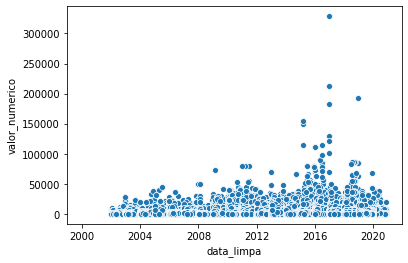

In [13]:
import seaborn as sns
sns.scatterplot(data=df, x="data_limpa", y="valor_numerico")

In [14]:
df.query('valor_numerico > 100000').sort_values('valor_numerico', ascending=False)

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO,DATA,VALOR (R$),ano,valor_limpo,valor_numerico,data_limpa
197852,***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,RPA [P.FÍSICA],3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,19/12/2016,"328.428,65",2016,328428.65,"$328,428.65",2016-12-19
193555,***.468.963-**,FRANCISCO SULIANO MESQUITA DE PAULA,RPA [P.FÍSICA],3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,19/12/2016,"212.758,81",2016,212758.81,"$212,758.81",2016-12-19
199211,***.966.093-**,FAUSTO NILO COSTA JUNIOR,RPA [P.FÍSICA],3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,19/12/2016,"212.391,25",2016,212391.25,"$212,391.25",2016-12-19
226382,***.966.093-**,FAUSTO NILO COSTA JUNIOR,RPA [P.FÍSICA],3399 - CT.IPLANFOR/FCPC - FORTALEZA 2040 - PLA...,12/12/2018,"192.114,46",2018,192114.46,"$192,114.46",2018-12-12
189533,***.140.963-**,FRANCISCO QUEIROZ D. NETO,RPA [P.FÍSICA],3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,19/12/2016,"182.058,44",2016,182058.44,"$182,058.44",2016-12-19
185005,***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,RPA [P.FÍSICA],3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,26/02/2015,"154.874,13",2015,154874.13,"$154,874.13",2015-02-26
178411,***.468.963-**,FRANCISCO SULIANO MESQUITA DE PAULA,RPA [P.FÍSICA],3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,27/02/2015,"150.095,24",2015,150095.24,"$150,095.24",2015-02-27
190740,***.254.288-**,ALEXANDER DE SOUZA LARANJEIRA,RPA [P.FÍSICA],3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,19/12/2016,"129.695,70",2016,129695.70,"$129,695.70",2016-12-19
193333,***.457.143-**,DELBERG PONCE DE LEON,RPA [P.FÍSICA],3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,19/12/2016,"120.608,89",2016,120608.89,"$120,608.89",2016-12-19
197853,***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,RPA [P.FÍSICA],3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,17/06/2016,"114.179,77",2016,114179.77,"$114,179.77",2016-06-17


## Análise por projeto

In [25]:
total_projeto_s =  df.groupby(['PROJETO'])['valor_numerico'].sum()
total_projeto_s.sort_values(ascending=False).head(20)

PROJETO
0101 - FCPC                                                                           $25,707,002.56
1089 - RESCISAO CONTRATUAL                                                            $15,772,915.80
2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DOS CURSOS DE GRADUACAO DA UAB/UFC 2012    $8,885,282.87
3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO FORTALEZA 2040                            $5,688,787.35
3143 - TC - LG/UFC/FCPC - MOBILE, TOOLS & CAS                                          $5,646,393.81
2922 - CT - PETROBRAS - PROJETO AMBES                                                  $4,976,992.54
3052 - TERMO DE COOPERACAO LG/UFC/FCPC - PT 12                                         $4,892,107.64
3253 - TC. LG/UFC/FCPC - MOBILE, TOOLS & CAS                                           $4,375,447.20
3053 - TERMO DE COOPERACAO LG/UFC/FCPC - PT 13                                         $3,855,831.70
2955 - CV - LG/UFC/FCPC - PLANO DE TRABALHO 10                                     

In [0]:
total_projeto_df = total_projeto_s.to_frame()
total_projeto_df = total_projeto_df.reset_index()

In [43]:
total_projeto_df.query("PROJETO.str.contains('IPLANFOR')", engine='python').sum()

PROJETO           3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...
valor_numerico                                       $11,851,091.85
dtype: object

In [49]:
total_projeto_df.query("PROJETO.str.contains('HABITAFOR')", engine='python').sum()

PROJETO           1645 - CV - FCPC/HABITAFOR-F.HABIT.DE FORTALEZ...
valor_numerico                                       $10,629,537.98
dtype: object

In [53]:
df.dropna().query("PROJETO.str.contains('IPLANFOR')", engine='python').sort_values('ano', ascending=False)

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO,DATA,VALOR (R$),ano,valor_limpo,valor_numerico,data_limpa
239101,***.958.373-**,MARIA ANDRADE LEITE,RPA [P.FÍSICA],3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FA...,28/02/2019,"3.050,00",2019,3050.00,"$3,050.00",2019-02-28
231458,***.364.573-**,FRANCISCO CARLOS FALCAO JUNIOR,RPA [P.FÍSICA],3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FA...,28/02/2019,"3.050,00",2019,3050.00,"$3,050.00",2019-02-28
227020,***.010.773-**,GABRIELLE DE OLIVEIRA SENA,RPA [P.FÍSICA],3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FA...,08/05/2019,"3.050,00",2019,3050.00,"$3,050.00",2019-08-05
227021,***.010.773-**,GABRIELLE DE OLIVEIRA SENA,RPA [P.FÍSICA],3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FA...,13/03/2019,"3.050,00",2019,3050.00,"$3,050.00",2019-03-13
228818,***.143.953-**,BRUNO CASELY CAVALCANTI MEDEIROS,RPA [P.FÍSICA],3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FA...,12/04/2019,"3.800,00",2019,3800.00,"$3,800.00",2019-12-04
...,...,...,...,...,...,...,...,...,...,...
181591,***.632.373-**,SIMONE LOPES SOARES,RPA [P.FÍSICA],3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,28/12/2015,"2.810,87",2015,2810.87,"$2,810.87",2015-12-28
181573,***.631.363-**,FRANCISCO DE ASSIS REBOUCAS BARBOSA,RPA [P.FÍSICA],3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,23/09/2015,"9.000,00",2015,9000.00,"$9,000.00",2015-09-23
180908,***.590.773-**,ALBERTO MAGNO PEDIGAO SILVEIRA,RPA [P.FÍSICA],3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,26/02/2015,"24.600,00",2015,24600.00,"$24,600.00",2015-02-26
180907,***.590.773-**,ALBERTO MAGNO PEDIGAO SILVEIRA,RPA [P.FÍSICA],3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,11/05/2015,"24.600,00",2015,24600.00,"$24,600.00",2015-11-05


## Análise de Projetos por ANO

In [56]:
total_projeto_ano_s =  df.groupby(['ano','PROJETO'])['valor_numerico'].sum()
total_projeto_ano_s.sort_values(ascending=False).head(20)

ano   PROJETO                                                                            
2016  3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO FORTALEZA 2040                           $4,372,959.66
2015  3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO FORTALEZA 2040                          $3,115,891.68
      0101 - FCPC                                                                           $3,092,884.39
2010  2427 - CV - HABITAFOR/FCPC - 01/2010                                                  $3,088,039.33
2015  3143 - TC - LG/UFC/FCPC - MOBILE, TOOLS & CAS                                         $2,883,220.45
2019  0101 - FCPC                                                                           $2,683,636.87
2016  3143 - TC - LG/UFC/FCPC - MOBILE, TOOLS & CAS                                         $2,671,920.41
      0101 - FCPC                                                                           $2,591,622.69
2009  2228 - CV -  PMF/FCPC - HABITAFOR                       

In [0]:
total_projeto_ano_df = total_projeto_ano_s.to_frame()
total_projeto_ano_df = total_projeto_ano_df.reset_index()

In [64]:
total_projeto_ano_df.query("PROJETO.str.contains('IPLANFOR')", engine='python').sort_values('ano', ascending=False)

,ano,PROJETO,valor_numerico
4288,2019,3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FA...,"$198,855.00"
4158,2018,3365 - CT. IPLANFOR/FCPC - FORTALEZA 2040 - FA...,"$516,724.28"
4190,2018,3399 - CT.IPLANFOR/FCPC - FORTALEZA 2040 - PLA...,"$2,330,833.54"
3903,2017,3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,"$130,177.64"
3789,2016,3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,"$4,372,959.66"
3677,2015,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,"$3,115,891.68"
3678,2015,3098 - CT. FCPC/IPLANFOR - PLANO ESTRATÉGICO F...,"$1,185,650.05"
